## Observations and Insights 

In [1]:
#Look across all previously generated figures and tables and write at least three observations or inferences that can be made from the data. Include these observations at the top of notebook.
#Ramicane and Capomulin regimens had smaller median tumor size
#Ramicane and Capomulin studies took more measurements of tumors
#Male to Female mice were fairly evenly distributed overall at 51% and 49%
#The Capomulin mouse had a large decline in tumor size each timepoint 

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

print(study_results.head(10))
mouse_metadata.head(10)

  Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites
0     b128          0                45.0                 0
1     f932          0                45.0                 0
2     g107          0                45.0                 0
3     a457          0                45.0                 0
4     c819          0                45.0                 0
5     h246          0                45.0                 0
6     p189          0                45.0                 0
7     n923          0                45.0                 0
8     q119          0                45.0                 0
9     f993          0                45.0                 0


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16
5,s508,Ramicane,Male,1,17
6,f966,Capomulin,Male,16,17
7,m546,Ramicane,Male,18,16
8,z578,Ramicane,Male,11,16
9,j913,Ramicane,Female,4,17


In [3]:
# Combine the data into a single dataset
#Use mouse ID as field
merge_df = pd.merge(study_results, mouse_metadata, on="Mouse ID", how="left")
merge_df

# Display the data table for preview

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [4]:
# Checking the number of mice.
#len  count  value.count-(the number of times this value appears in the dataframe) and n-unique
mice_counts =len(merge_df["Mouse ID"].unique())
mice_counts


249

In [5]:
#duplicated function  find duplicated rows and loc function to view
merge_df.loc[merge_df.duplicated(subset=['Mouse ID', 'Timepoint']),'Mouse ID'].unique()


array(['g989'], dtype=object)

In [6]:
# Optional: Get all the data for the duplicate mouse ID. 
dup_mouse = merge_df.loc[merge_df["Mouse ID"] == 'g989']
dup_mouse


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [7]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_mouse_df = merge_df.loc[(
    merge_df["Mouse ID"] != 'g989')]
clean_mouse_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [8]:
# Checking the number of mice in the clean DataFrame.
mice_counts2 =len(clean_mouse_df["Mouse ID"].unique())
mice_counts2

248

## Summary Statistics

In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

mean = clean_mouse_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
median = clean_mouse_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
variance = clean_mouse_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
standard_deviation = clean_mouse_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
sem = clean_mouse_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()

statistics_df = pd.DataFrame ({
    "Mean Tumor Volume": mean,
    "Median Tumor Volume": median,
    "Variance of Tumor Volume": variance,
    "Standard Deviation of Tumor Volume": standard_deviation,
    "Standard Error of the Mean of Tumor Volume": sem
    
})

statistics_df

,Mean Tumor Volume,Median Tumor Volume,Variance of Tumor Volume,Standard Deviation of Tumor Volume,Standard Error of the Mean of Tumor Volume
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [10]:
# Using the aggregation method, produce the same summary statistics in a single line
grouped_mouse_df = clean_mouse_df.groupby('Drug Regimen')

statistics_summary = grouped_mouse_df.agg(['mean','median','var','std','sem'])["Tumor Volume (mm3)"]
statistics_summary

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

In [11]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.

Count_Measure = clean_mouse_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].count()
regimen = ["Capomulin", "Ceftamin", "Infubinol", "Ketapril", "Nafitsol", "Placebo", "Propriva", "Ramicane", "Stelasyn", "Zoniferol"]

Count_Measure_df = pd.DataFrame ({
    "Count of Measurements": Count_Measure,
    "Drug Regimen": regimen
})

Count_Measure_df

# Filter the DataFrame down only to those columns to chart
#volume_and_regimen = Count_Measure[["Drug Regimen","Tumor Volume (mm3)"]]

# Set the index to be Regimen so it will be used as label
volume_and_regimen = Count_Measure_df.set_index("Drug Regimen")

Count_Measure.head()

Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Name: Tumor Volume (mm3), dtype: int64

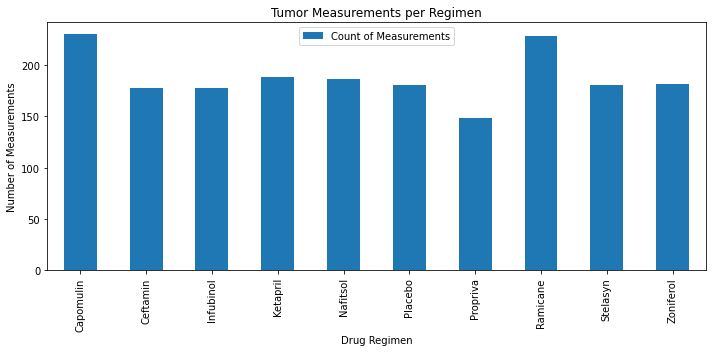

In [12]:
# Use DataFrame.plot() in order to create a bar chart of the data
volume_and_regimen.plot(kind="bar", figsize=(10,5))

# Set a title for the chart
plt.title("Tumor Measurements per Regimen")
plt.ylabel("Number of Measurements")
plt.tight_layout()
plt.show()


In [13]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
Count_Measure = clean_mouse_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].count()
Count_Measure

Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     148
Ramicane     228
Stelasyn     181
Zoniferol    182
Name: Tumor Volume (mm3), dtype: int64

Text(0.5, 0, 'Regimen')

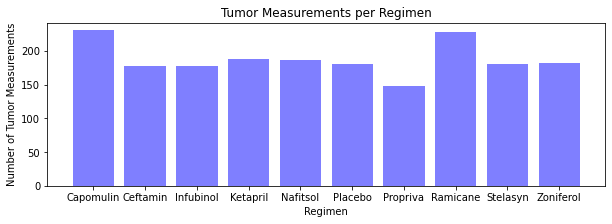

In [14]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
y_axis = Count_Measure
y_axis

regimen = ["Capomulin", "Ceftamin", "Infubinol", "Ketapril", "Nafitsol", "Placebo", "Propriva", "Ramicane", "Stelasyn", "Zoniferol"]
x_axis = regimen
x_axis

plt.figure(figsize=(10,3))
plt.bar(x_axis, y_axis, color='b', alpha=0.5, align="center")

plt.title("Tumor Measurements per Regimen")
plt.ylabel("Number of Tumor Measurements")
plt.xlabel("Regimen")


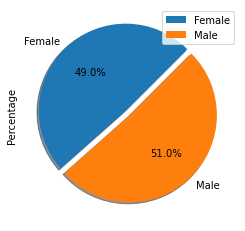

In [15]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

# Create a group based on the values in the 'sex' column
grouped_mouse_df = clean_mouse_df.groupby('Sex')

# Count how many times each sex appears in our group and add a total count column
count_sex = pd.DataFrame(grouped_mouse_df['Sex'].count())
count_sex.columns = ["Total Count"]

#create a new column for the percentage of each gender
count_sex["Percentage"] = (100*(count_sex["Total Count"]/count_sex["Total Count"].sum()))
#count_sex.head()

#Create a pie chart 
count_sex = count_sex.plot(kind='pie', y='Percentage', autopct="%1.1f%%", startangle=45, explode = (.07,0), shadow = True)






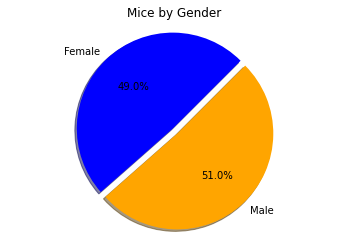

In [16]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
# Labels for the sections of our pie chart

labels = ["Female", "Male"]

# The values of each section of the pie chart
percent = [49, 51]

# The colors of each section of the pie chart
colors = ["blue", "orange"]

# Tells matplotlib to seperate the "Female" section from the others
explode = (0.07, 0)

plt.pie(percent, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=45)

plt.title("Mice by Gender")
plt.axis("equal")
plt.show()

## Quartiles, Outliers and Boxplots

In [17]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
last_df = clean_mouse_df.groupby(["Mouse ID"])["Timepoint"].max()
last_df = last_df.reset_index()

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint

merge2_df = last_df.merge(clean_mouse_df,on=["Mouse ID", "Timepoint"])
merge2_df

# Display the data table for preview

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
243,z435,10,48.710661,0,Propriva,Female,12,26
244,z578,45,30.638696,0,Ramicane,Male,11,16
245,z581,45,62.754451,3,Infubinol,Female,24,25
246,z795,45,65.741070,3,Naftisol,Female,13,29


In [18]:
# Put treatments into a list for for loop (and later for plot labels)
drugs = ["Capomulin", "Ceftamin", "Infubinol", "Ramicane"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in drugs:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    drug_row = merge2_df.loc[merge2_df['Drug Regimen'] == drug, "Tumor Volume (mm3)"]
    
    # add subset 
    tumor_data.append(drug_row)
    
    print(tumor_data)
  

[19     38.982878
24     38.939633
61     30.485985
64     37.074024
66     40.159220
80     47.685963
83     37.311846
85     38.125164
87     38.753265
108    41.483008
115    38.846876
121    28.430964
124    33.329098
162    46.539206
163    32.377357
169    41.581521
174    23.343598
180    40.728578
183    34.455298
192    31.023923
204    40.658124
208    39.952347
220    36.041047
226    28.484033
239    31.896238
Name: Tumor Volume (mm3), dtype: float64]
[19     38.982878
24     38.939633
61     30.485985
64     37.074024
66     40.159220
80     47.685963
83     37.311846
85     38.125164
87     38.753265
108    41.483008
115    38.846876
121    28.430964
124    33.329098
162    46.539206
163    32.377357
169    41.581521
174    23.343598
180    40.728578
183    34.455298
192    31.023923
204    40.658124
208    39.952347
220    36.041047
226    28.484033
239    31.896238
Name: Tumor Volume (mm3), dtype: float64, 3      62.999356
21     45.000000
22     56.057749
25     55.742

In [19]:
#Calculate the IQR and quantitatively determine if there are any potential outliers.
#Determine outliers using upper and lower bounds
    
quartiles = drug_row.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of drugs is: {lowerq}")
print(f"The upper quartile of drugs is: {upperq}")
print(f"The interquartile range of drugs is: {iqr}")
print(f"The the median of drugs is: {quartiles[0.5]} ")

    
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of drugs is: 31.56046955
The upper quartile of drugs is: 40.65900627
The interquartile range of drugs is: 9.098536719999998
The the median of drugs is: 36.56165229 
Values below 17.912664470000003 could be outliers.
Values above 54.30681135 could be outliers.


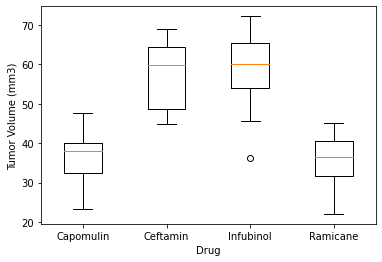

In [20]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

plt.boxplot(tumor_data, labels=drugs)
plt.xlabel("Drug")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

## Line and Scatter Plots

In [31]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
#choose any mouse ID with Capomulin
#use the .loc for the mouse ID then get a df for that mouse and do the line plot
capomulin_df = merge2_df.sort_values("Drug Regimen")
capomulin_df = pd.DataFrame(clean_mouse_df.loc[clean_mouse_df["Drug Regimen"] == 'Capomulin'])
capomulin_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
226,j246,0,45.0,0,Capomulin,Female,21,21
227,r554,0,45.0,0,Capomulin,Female,8,17
228,s185,0,45.0,0,Capomulin,Female,3,17
229,b742,0,45.0,0,Capomulin,Male,7,21


     Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites Drug Regimen  \
227      r554          0           45.000000                 0    Capomulin   
433      r554          5           45.781746                 1    Capomulin   
498      r554         10           39.005494                 2    Capomulin   
808      r554         15           35.463758                 2    Capomulin   
940      r554         20           36.015589                 2    Capomulin   
1243     r554         25           33.893345                 3    Capomulin   
1340     r554         30           32.680655                 3    Capomulin   
1534     r554         35           33.069337                 3    Capomulin   
1734     r554         40           31.804841                 3    Capomulin   
1788     r554         45           32.377357                 3    Capomulin   

         Sex  Age_months  Weight (g)  
227   Female           8          17  
433   Female           8          17  
498   Female 

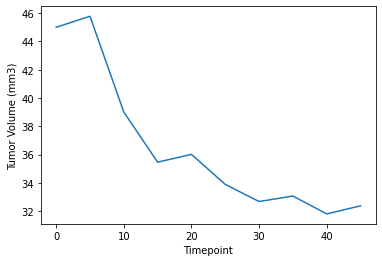

In [27]:
cap_mouse_df = pd.DataFrame(clean_mouse_df.loc[clean_mouse_df["Mouse ID"] == 'r554'])
cap_mouse_df
print(cap_mouse_df)
#index into the column names for the plot
plt.plot(cap_mouse_df["Timepoint"], cap_mouse_df["Tumor Volume (mm3)"])
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

In [58]:
#Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin treatment regimen.
#capomulin_df = merge2_df.sort_values("Drug Regimen")
capomulin_df = pd.DataFrame(clean_mouse_df.loc[clean_mouse_df["Drug Regimen"] == 'Capomulin'])
capomulin_df
#tumor_mean = capomulin_df.groupby(["Mouse ID"])["Tumor Volume (mm3)"].mean()
tumor_mean = capomulin_df.groupby(['Mouse ID']).mean()

Timepoint             25
Tumor Volume (mm3)    25
Metastatic Sites      25
Age_months            25
Weight (g)            25
dtype: int64

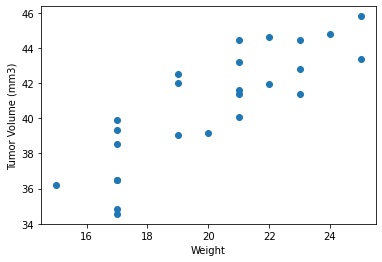

In [59]:
plt.scatter(tumor_mean['Weight (g)'],tumor_mean['Tumor Volume (mm3)'])
plt.xlabel("Weight")
plt.ylabel("Tumor Volume (mm3)")
plt.show()


In [ ]:
#Calculate the correlation coefficient 
#calculate the linear regression model between mouse weight and average tumor volume for the Capomulin treatment. 
#Plot the linear regression model on top of the previous scatter plot.

In [61]:
#Calculate the correlation coefficient 
#find the correlation of the two columns
correlation = st.pearsonr(tumor_mean['Weight (g)'],tumor_mean['Tumor Volume (mm3)'])
correlation[0]
print(f"The correlation between both factors is {round(correlation[0],2)}")

The correlation between both factors is 0.84


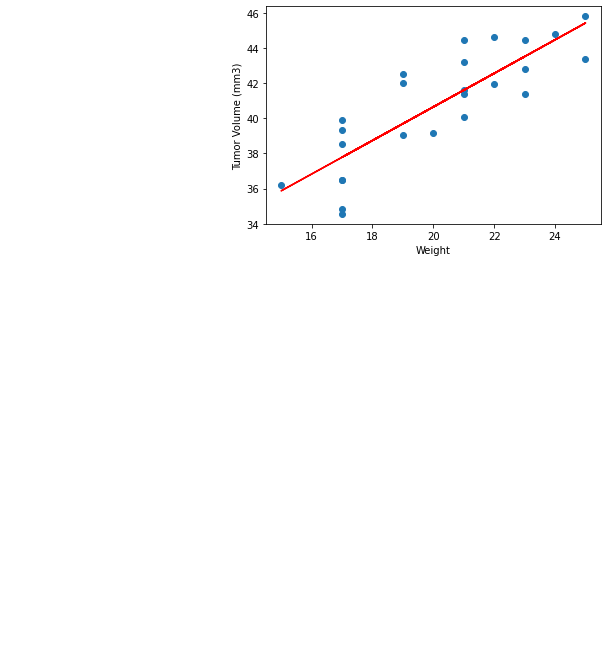

In [81]:
from scipy import stats
x_values = tumor_mean['Weight (g)']
y_values = tumor_mean['Tumor Volume (mm3)']

tv_slope, tv_int, tv_r, tv_p, tv_std_err = stats.linregress(x_values, y_values)
tv_fit = tv_slope * x_values + tv_int
#print(tv_fit)
regress_values = x_values * tv_slope + tv_int
line_eq = "y = " + str(round(tv_slope,2)) + "x + " + str(round(tv_int,2))

plt.scatter(tumor_mean['Weight (g)'],tumor_mean['Tumor Volume (mm3)'])
plt.xlabel("Weight")
plt.ylabel("Tumor Volume (mm3)")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.show()